In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import statsmodels.api as sm
import itertools
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, LSTM, GRU
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
# import tensorflow
# tensorflow.random.set_seed(1)
# from google.colab import files
# from keras.optimizers import SGD
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")


In [17]:
df = pd.read_csv("COMBINED.csv")

In [18]:
df.dropna().head(5)

,Date,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
0,04-01-2000,25.55,282.7,1411.75,100.10,6.499,289.10
1,05-01-2000,24.91,281.1,1413.50,100.05,6.599,292.64
2,06-01-2000,24.78,281.4,1404.00,100.34,6.540,297.70
4,10-01-2000,24.67,281.7,1475.00,100.65,6.554,294.37
5,11-01-2000,25.77,283.4,1454.25,100.26,6.659,298.00


In [19]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.head()

,Date,WTI,GOLD,SP 500,US DOLLAR INDEX,US 10YR BOND,DJU
0,2000-01-04,25.55,282.7,1411.75,100.10,6.499,289.10
1,2000-01-05,24.91,281.1,1413.50,100.05,6.599,292.64
2,2000-01-06,24.78,281.4,1404.00,100.34,6.540,297.70
3,2000-01-07,24.22,281.9,1460.50,100.50,6.513,NaN
4,2000-01-10,24.67,281.7,1475.00,100.65,6.554,294.37


In [20]:
# df = df[[ "WTI", "GOLD", "US DOLLAR INDEX"]]
# df

In [21]:
df = df[["Date", "WTI", "GOLD", "US DOLLAR INDEX"]]

In [22]:
df

,Date,WTI,GOLD,US DOLLAR INDEX
0,2000-01-04,25.55,282.70,100.100
1,2000-01-05,24.91,281.10,100.050
2,2000-01-06,24.78,281.40,100.340
3,2000-01-07,24.22,281.90,100.500
4,2000-01-10,24.67,281.70,100.650
...,...,...,...,...
4942,2019-06-05,51.68,1328.30,97.251
4943,2019-06-06,52.59,1337.60,96.997
4944,2019-06-07,53.99,1341.20,96.490
4945,2019-06-09,54.44,1338.95,NaN


In [23]:
df.set_index('Date',inplace=True)

In [24]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [25]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [26]:
adf_test(df['GOLD'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.183290
p-value                    0.680742
# lags used               12.000000
# observations          4928.000000
critical value (1%)       -3.431678
critical value (5%)       -2.862127
critical value (10%)      -2.567082
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [27]:
adf_test(df['WTI'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.004742
p-value                    0.284498
# lags used                5.000000
# observations          4941.000000
critical value (1%)       -3.431674
critical value (5%)       -2.862125
critical value (10%)      -2.567081
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [28]:
adf_test(df['US DOLLAR INDEX'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.641191
p-value                    0.461638
# lags used               32.000000
# observations          4884.000000
critical value (1%)       -3.431690
critical value (5%)       -2.862132
critical value (10%)      -2.567085
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [29]:
# train = df[:int(0.95*(len(df)))]
test_orig = df[int(0.95*(len(df))):]

In [30]:
df_difference = df.diff()

In [31]:
adf_test(df_difference['WTI'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -32.079650
p-value                    0.000000
# lags used                4.000000
# observations          4941.000000
critical value (1%)       -3.431674
critical value (5%)       -2.862125
critical value (10%)      -2.567081
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [32]:
adf_test(df_difference['GOLD'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -21.505587
p-value                    0.000000
# lags used               11.000000
# observations          4922.000000
critical value (1%)       -3.431679
critical value (5%)       -2.862127
critical value (10%)      -2.567083
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [33]:
adf_test(df_difference['US DOLLAR INDEX'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.504227e+01
p-value                 9.554975e-28
# lags used             2.000000e+01
# observations          4.865000e+03
critical value (1%)    -3.431695e+00
critical value (5%)    -2.862134e+00
critical value (10%)   -2.567086e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [34]:
test_obs = 248
train = df_difference[:-test_obs]
test = df_difference[-test_obs:]
#creating the train and validation set
#train = df_difference[:int(0.95*(len(df_difference)))]
#test = df_difference[int(0.95*(len(df_difference))):]

In [35]:
train.head(5)

,WTI,GOLD,US DOLLAR INDEX
Date,,,
2000-01-04,NaN,NaN,NaN
2000-01-05,-0.64,-1.6,-0.05
2000-01-06,-0.13,0.3,0.29
2000-01-07,-0.56,0.5,0.16
2000-01-10,0.45,-0.2,0.15


In [36]:
train =train.dropna()

In [37]:
test =test.dropna()

In [38]:
test.head(5)

,WTI,GOLD,US DOLLAR INDEX
Date,,,
2018-07-04,-0.01,-24.9,0.000
2018-07-05,-1.19,30.0,-0.189
2018-07-06,0.86,-2.8,-0.454
2018-07-09,0.05,4.0,0.038
2018-07-10,0.26,-3.8,0.082


In [39]:
train.head(5)

,WTI,GOLD,US DOLLAR INDEX
Date,,,
2000-01-05,-0.64,-1.6,-0.05
2000-01-06,-0.13,0.3,0.29
2000-01-07,-0.56,0.5,0.16
2000-01-10,0.45,-0.2,0.15
2000-01-11,1.10,1.7,-0.39


In [43]:
from statsmodels.tsa.vector_ar.var_model import VAR
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  4.3633071442142874
BIC:  4.379965670754019

Order = 2
AIC:  4.359894415956452
BIC:  4.389052144954216

Order = 3
AIC:  4.362160584594745
BIC:  4.403822068350415

Order = 4
AIC:  4.361069128704635
BIC:  4.415238922192087

Order = 5
AIC:  4.361620644923903
BIC:  4.428303305793169

Order = 6
AIC:  4.364858762034754
BIC:  4.4440588506141765

Order = 7
AIC:  4.367666135134497
BIC:  4.459388214432878

Order = 8
AIC:  4.367562837979706
BIC:  4.471811473688472

Order = 9
AIC:  4.366693951434903
BIC:  4.483473711930262

Order = 10
AIC:  4.3685131950218725
BIC:  4.497828651366975

Order = 11
AIC:  4.369853900805661
BIC:  4.511709626752765

Order = 12
AIC:  4.36988198135983
BIC:  4.524282553352467

Order = 13
AIC:  4.370872781920602
BIC:  4.537822779095749

Order = 14
AIC:  4.374035355371998
BIC:  4.553539359562242

Order = 15
AIC:  4.376044607930713
BIC:  4.568107203666432



In [44]:
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Nov, 2022
Time:                     11:35:01
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    4.38905
Nobs:                     4640.00    HQIC:                   4.37015
Log likelihood:          -29845.6    FPE:                    78.2489
AIC:                      4.35989    Det(Omega_mle):         77.8958
--------------------------------------------------------------------
Results for equation WTI
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.008281         0.020747            0.399           0.690
L1.WTI                    -0.044906         0.015319           -2.931           0.003
L1.GOLD                    0.000615       

In [45]:
lagged_Values = train.values[-3:]

In [47]:
pred = result.forecast(y=lagged_Values, steps=248) 

idx = pd.date_range('2018-07-04	', periods=248, freq='D')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=['WTI_2d', "GOLD_2d", 'US_DOLLAR_INDEX_2d'])

In [48]:
df_forecast.head(5)

,WTI_2d,GOLD_2d,US_DOLLAR_INDEX_2d
2018-07-04,-0.090291,-0.852783,0.012695
2018-07-05,0.083332,0.299793,-0.008612
2018-07-06,0.002747,0.444462,0.000276
2018-07-07,0.006968,0.295514,-0.000573
2018-07-08,0.010650,0.341151,-0.000775


In [49]:
forecast_final = pd.DataFrame()

In [50]:
#WTI
df_forecast['WTI1d'] = (df['WTI'].iloc[-test_obs-1]-df['WTI'].iloc[-test_obs-2]) + df_forecast['WTI_2d'].cumsum()
forecast_final['WTIForecast'] = df['WTI'].iloc[-test_obs-1] + df_forecast['WTI1d'].cumsum()

df_forecast['GOLD1d'] = (df['GOLD'].iloc[-test_obs-1]-df['GOLD'].iloc[-test_obs-2]) + df_forecast['GOLD_2d'].cumsum()
forecast_final['GOLDForecast'] = df['GOLD'].iloc[-test_obs-1] + df_forecast['GOLD1d'].cumsum()

df_forecast['US DOLLAR INDEX1d'] = (df['US DOLLAR INDEX'].iloc[-test_obs-1]-df['US DOLLAR INDEX'].iloc[-test_obs-2]) + df_forecast['US_DOLLAR_INDEX_2d'].cumsum()
forecast_final['US DOLLAR INDEXForecast'] = df['US DOLLAR INDEX'].iloc[-test_obs-1] + df_forecast['US DOLLAR INDEX1d'].cumsum()

# df_forecast['DJU1d'] = (df['DJU'].iloc[-test_obs-1]-df['DJU'].iloc[-test_obs-2]) + df_forecast['DJU_2d'].cumsum()
# forecast_final['DJUForecast'] = df['DJU'].iloc[-test_obs-1] + df_forecast['DJU1d'].cumsum()

# df_forecast['SP 5001d'] = (df['SP 500'].iloc[-test_obs-1]-df['SP 500'].iloc[-test_obs-2]) + df_forecast['SP500_2d'].cumsum()
# forecast_final['SP 500Forecast'] = df['SP 500'].iloc[-test_obs-1] + df_forecast['SP 5001d'].cumsum()

# df_forecast['US 10YR BOND1d'] = (df['US 10YR BOND'].iloc[-test_obs-1]-df['US 10YR BOND'].iloc[-test_obs-2]) + df_forecast['US_10YR_BOND_2d'].cumsum()
# forecast_final['US 10YR BONDForecast'] = df['US 10YR BOND'].iloc[-test_obs-1] + df_forecast['US 10YR BOND1d'].cumsum()

# Predicting for a week

<AxesSubplot:>

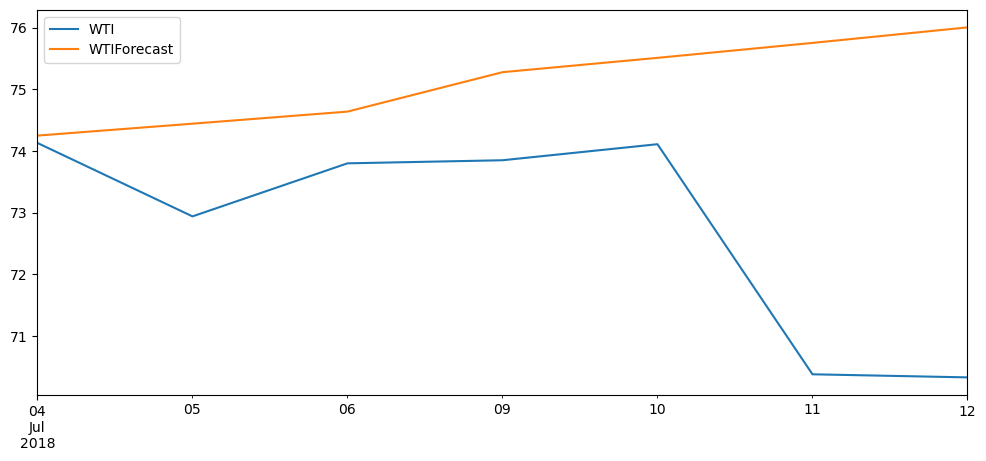

In [51]:
final = forecast_final.join(test_orig).dropna().head(7)
final['WTI'].plot(figsize=(12,5),legend=True)
final['WTIForecast'].plot(legend=True)

In [53]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(final['WTI'], final['WTIForecast'])

0.032687409118722734

# Prediction for a month

In [54]:
final = forecast_final.join(test_orig).dropna().head(30)

<AxesSubplot:>

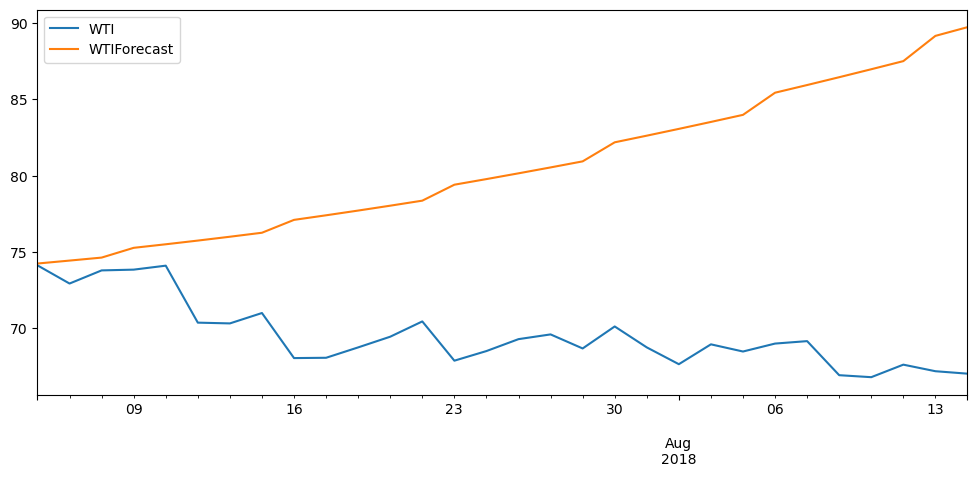

In [55]:
final['WTI'].plot(figsize=(12,5),legend=True)
final['WTIForecast'].plot(legend=True)

In [56]:
mean_absolute_percentage_error(final['WTI'], final['WTIForecast'])

0.16118310584943255

In [57]:
# df.corr()

# Predicting for whole test set

In [58]:
final = forecast_final.join(test_orig).dropna()

<AxesSubplot:>

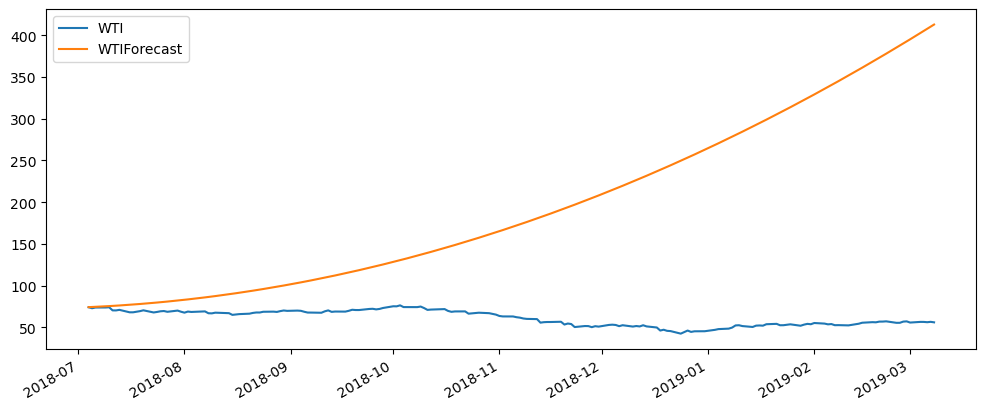

In [60]:
final['WTI'].plot(figsize=(12,5),legend=True)
final['WTIForecast'].plot(legend=True)

In [61]:
mean_absolute_percentage_error(final['WTI'], final['WTIForecast'])

2.432422341547191